In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from itertools import count
from collections import OrderedDict

In [3]:
customers = pd.read_csv('customers.csv')

In [116]:
order_items = pd.read_csv('order_items.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

### Double checking order items info, it has only sale starting 2015_04_02, as such first two years revenue information will be missing

In [146]:
order_items1 = pd.read_csv('order_items.csv')
print order_items1['created_at'].min(), order_items1['created_at'].max()

2015-04-02 12:00:00 2016-04-23 12:00:00


In [15]:
customers.head(1)

,id,first_name,last_name,email,orders_count,created_at,updated_at
0,1,Nigel,Larson,stan_crona@paucek.co,NaN,2015-04-02 12:00:00,2016-04-24 19:04:05


In [21]:
customers.describe()

,id,orders_count
count,388510.000000,0.0
mean,194255.500000,NaN
std,112153.320878,NaN
min,1.000000,NaN
25%,97128.250000,NaN
50%,194255.500000,NaN
75%,291382.750000,NaN
max,388510.000000,NaN


In [10]:
order_items.head(1)

,id,order_id,product_id,quantity,created_at,updated_at
0,1,1,1,1,2015-04-02 12:00:00,2016-04-24 19:04:05


In [128]:
# Order items tables starts from 2015-04-02 while orders starts from 2013-04-02, two years are missing
order_items['created_at'].min()

'2015-04-02 12:00:00'

In [20]:
order_items.describe()

,id,order_id,product_id,quantity
count,665870.00000,665870.00000,665870.000000,665870.0
mean,332935.50000,332935.50000,5.496139,1.0
std,192220.25621,192220.25621,2.872268,0.0
min,1.00000,1.00000,1.000000,1.0
25%,166468.25000,166468.25000,3.000000,1.0
50%,332935.50000,332935.50000,5.000000,1.0
75%,499402.75000,499402.75000,8.000000,1.0
max,665870.00000,665870.00000,10.000000,1.0


In [117]:
orders.head(5)

,id,customer_id,mc_cid,created_at,updated_at
0,1,1,aadf87qef-2013-04-01,2013-04-07 12:00:00,2016-04-28 21:15:27
1,2,2,aadf87qef-2013-04-01,2013-04-04 12:00:00,2016-04-28 21:15:27
2,3,4,aadf87qef-2013-04-01,2013-04-06 12:00:00,2016-04-28 21:15:27
3,4,3,aadf87qef-2013-04-01,2013-04-08 12:00:00,2016-04-28 21:15:27
4,5,10,aadf87qef-2013-04-01,2013-04-04 12:00:00,2016-04-28 21:15:27


In [130]:
orders['created_at'].min()

'2013-04-02 12:00:00'

In [122]:
orders.describe()

,id,customer_id,Date_month,Date_month_created,YearMonth,order_id
count,3.577289e+06,3.577289e+06,3577289.0,3.577289e+06,3.577289e+06,3.577289e+06
mean,1.788645e+06,4.293466e+05,4.0,6.354245e+00,2.014725e+05,1.788645e+06
std,1.032675e+06,2.959566e+05,0.0,3.558713e+00,8.764467e+01,1.032675e+06
min,1.000000e+00,1.000000e+00,4.0,1.000000e+00,2.013040e+05,1.000000e+00
25%,8.943230e+05,1.759130e+05,4.0,3.000000e+00,2.014070e+05,8.943230e+05
50%,1.788645e+06,3.833610e+05,4.0,6.000000e+00,2.015040e+05,1.788645e+06
75%,2.682967e+06,6.486640e+05,4.0,1.000000e+01,2.015110e+05,2.682967e+06
max,3.577289e+06,1.122104e+06,4.0,1.200000e+01,2.016040e+05,3.577289e+06


In [121]:
orders['customer_id'].value_counts().head(5) # 144798 has 17 orders

144798    17
13520     17
174451    16
12279     16
2607      16
Name: customer_id, dtype: int64

In [16]:
products.head(1)

,id,name,category,price,created_at,updated_at
0,1,Exotic Meats Crate,food,8999,2016-04-24 19:04:05,2016-04-24 19:04:05


In [19]:
products.describe()

,id,price
count,10.00000,10.000000
mean,5.50000,7509.000000
std,3.02765,3546.657268
min,1.00000,1099.000000
25%,3.25000,5249.000000
50%,5.50000,7999.000000
75%,7.75000,9749.000000
max,10.00000,12999.000000


### Transorming date information to datetime format

In [131]:
orders['Date_created'] = pd.to_datetime(orders['created_at'])


#### Creating a column containing only Year and Month

In [129]:
orders.head(1)

,id,customer_id,mc_cid,created_at,updated_at
0,1,1,aadf87qef-2013-04-01,2013-04-07 12:00:00,2016-04-28 21:15:27


#### Creating columns with month only. Date when created should be used

In [7]:

orders['Date_month_created'] = orders['Date_created'].dt.month

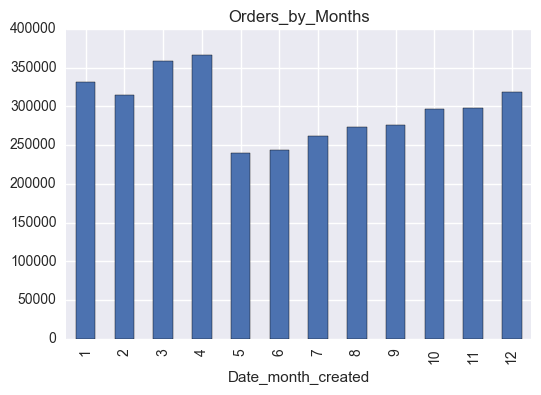

In [106]:
orders_by_month =orders.groupby('Date_month_created')['customer_id'].count()
orders_by_month.to_csv('Orders_by_months', sep='\t')
orders_by_month
plot = orders_by_month.plot(kind='bar', title = 'Orders_by_Months', use_index=True)
fig1 = plot.get_figure()
fig1.savefig('Orders_by_month.png') #saving chart to file


#### Grouping dataframe by YearMonth (not sure if it is required though)

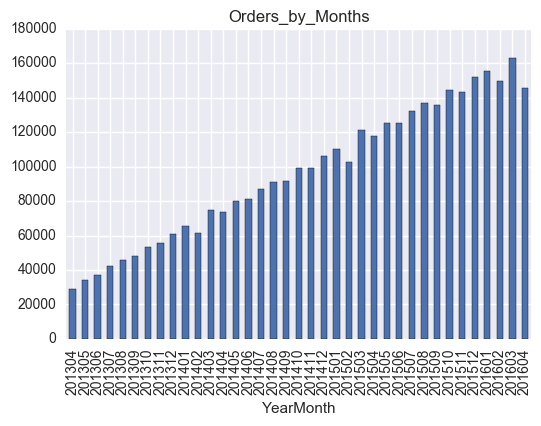

In [27]:
orders_by_month_year = orders.groupby("YearMonth")['customer_id'].count()
orders_by_month_year.to_csv('Orders_by_month_year', sep='\t')
orders_by_month_year.to_csv('Orders_by_months_year', sep='\t')
plot = orders_by_month_year.plot(kind='bar', title = 'Orders_by_Months', use_index=True)
fig3 = plot.get_figure()
fig3.savefig('Orders_by_month_year.png') #saving chart to file

### Creating a joined dataframe
Need to understand what rows to join on, a order_id, id tie with one another but have different dates, as order_items dataframe started two years later.
It is important to join via 'left' all all orders should be filled with order_items. If inner is created only part orders will be joined
We will join Products and Order_items dfs to determine monthly sales


In [8]:
items_products = pd.merge(order_items, products, how='left', left_on='product_id', right_on='id')

In [12]:
items_products.head(1)

,id_x,order_id,product_id,quantity,created_at_x,updated_at_x,id_y,name,category,price,created_at_y,updated_at_y
0,1,1,1,1,2015-04-02 12:00:00,2016-04-24 19:04:05,1,Exotic Meats Crate,food,8999,2016-04-24 19:04:05,2016-04-24 19:04:05


In [22]:
items_products.describe()
# quantity is one for each order_ID. So we don't have to time price and quantity

,id_x,order_id,product_id,quantity,id_y,price,YearMonth
count,665870.00000,665870.00000,665870.000000,665870.0,665870.000000,665870.000000,665870.000000
mean,332935.50000,332935.50000,5.496139,1.0,5.496139,7513.397105,201544.983976
std,192220.25621,192220.25621,2.872268,0.0,2.872268,3361.425886,45.800733
min,1.00000,1.00000,1.000000,1.0,1.000000,1099.000000,201504.000000
25%,166468.25000,166468.25000,3.000000,1.0,3.000000,4999.000000,201508.000000
50%,332935.50000,332935.50000,5.000000,1.0,5.000000,7999.000000,201511.000000
75%,499402.75000,499402.75000,8.000000,1.0,8.000000,9999.000000,201602.000000
max,665870.00000,665870.00000,10.000000,1.0,10.000000,12999.000000,201604.000000


In [15]:
# transforming the date stamp to appropriate format

In [14]:
items_products['Date_created'] = pd.to_datetime(items_products['created_at_x'])

In [18]:
#creating dateyear column
items_products['YearMonth'] = items_products['Date_created'].map(lambda x: 100*x.year + x.month)

In [19]:
items_products.head(1)

,id_x,order_id,product_id,quantity,created_at_x,updated_at_x,id_y,name,category,price,created_at_y,updated_at_y,Date_created,YearMonth
0,1,1,1,1,2015-04-02 12:00:00,2016-04-24 19:04:05,1,Exotic Meats Crate,food,8999,2016-04-24 19:04:05,2016-04-24 19:04:05,2015-04-02 12:00:00,201504


In [21]:
revenue = items_products[['YearMonth','quantity', 'price']]
revenue['revenue'] = revenue['quantity'] * revenue ['price']
revenue.head()

/Users/azizmamatov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,YearMonth,quantity,price,revenue
0,201504,1,8999,8999
1,201504,1,7999,7999
2,201504,1,4999,4999
3,201504,1,8999,8999
4,201504,1,8999,8999


In [23]:
revenue.describe()

,YearMonth,quantity,price,revenue
count,665870.000000,665870.0,665870.000000,665870.000000
mean,201544.983976,1.0,7513.397105,7513.397105
std,45.800733,0.0,3361.425886,3361.425886
min,201504.000000,1.0,1099.000000,1099.000000
25%,201508.000000,1.0,4999.000000,4999.000000
50%,201511.000000,1.0,7999.000000,7999.000000
75%,201602.000000,1.0,9999.000000,9999.000000
max,201604.000000,1.0,12999.000000,12999.000000


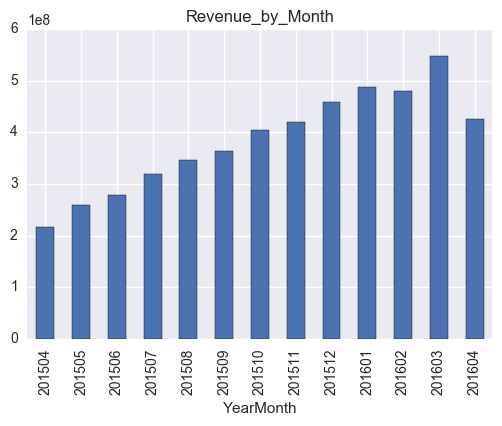

In [26]:
revenue_by_month = revenue.groupby("YearMonth")['revenue'].sum()
revenue_by_month
revenue_by_month.to_csv('Revenue_by_month', sep='\t')

plot = revenue_by_month.plot(kind='bar', title = 'Revenue_by_Month', use_index=True)
fig2 = plot.get_figure()
fig2.savefig('Revenue_by_month.png') #saving chart to file

### Cohort analysis - This method was not used in final submission, please look at different file
Create create a table showing the retention rate by monthly cohort
1. Create cohortDate based on min date of purchase. Count unique IDs.
2. Need to merge customers and orders tables

In [106]:
orders1 = pd.read_csv('orders.csv')

In [107]:
#must transform values to date, otherwise following functions will not work
orders1['Date_created'] = pd.to_datetime(orders1['created_at'])


In [108]:
orders1['OrderPeriod'] = orders1.Date_created.apply(lambda x: x.strftime('%Y-%m'))

In [109]:
orders1.head(1)

,id,customer_id,mc_cid,created_at,updated_at,Date_created,OrderPeriod
0,1,1,aadf87qef-2013-04-01,2013-04-07 12:00:00,2016-04-28 21:15:27,2013-04-07 12:00:00,2013-04


In [110]:
orders_customers1 = pd.merge(orders1, customers, how='left', left_on='customer_id', right_on='id')

In [111]:
orders_customers1.head()

,id_x,customer_id,mc_cid,created_at_x,updated_at_x,Date_created,OrderPeriod,id_y,first_name,last_name,email,orders_count,created_at_y,updated_at_y
0,1,1,aadf87qef-2013-04-01,2013-04-07 12:00:00,2016-04-28 21:15:27,2013-04-07 12:00:00,2013-04,1.0,Nigel,Larson,stan_crona@paucek.co,NaN,2015-04-02 12:00:00,2016-04-24 19:04:05
1,2,2,aadf87qef-2013-04-01,2013-04-04 12:00:00,2016-04-28 21:15:27,2013-04-04 12:00:00,2013-04,2.0,Jessy,Lynch,jonas_roob@davis.io,NaN,2015-04-08 12:00:00,2016-04-24 19:04:05
2,3,4,aadf87qef-2013-04-01,2013-04-06 12:00:00,2016-04-28 21:15:27,2013-04-06 12:00:00,2013-04,4.0,Lemuel,Hayes,simone.armstrong@hodkiewicz.io,NaN,2015-04-06 12:00:00,2016-04-24 19:04:05
3,4,3,aadf87qef-2013-04-01,2013-04-08 12:00:00,2016-04-28 21:15:27,2013-04-08 12:00:00,2013-04,3.0,Ocie,Davis,laurel@maggioswaniawski.org,NaN,2015-04-05 12:00:00,2016-04-24 19:04:05
4,5,10,aadf87qef-2013-04-01,2013-04-04 12:00:00,2016-04-28 21:15:27,2013-04-04 12:00:00,2013-04,10.0,Iva,Morissette,michale@olson.co,NaN,2015-04-08 12:00:00,2016-04-24 19:04:05


In [134]:
assert len(orders_customers1) == len(orders1) #checks if there same amount of rows

Determining the users cohort group based on first purchase

In [135]:
orders_customers1.set_index('customer_id', inplace=True) #cannot create index out of customer ID

In [102]:
'''df.set_index('UserId', inplace=True)

df['CohortGroup'] = df.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace=True)
df.head()'''

pandas.core.frame.DataFrame

In [136]:
orders_customers1['CohortGroup'] = orders_customers1.groupby(level=0)['Date_created'].min().apply(lambda x: x.strftime('%Y-%m'))
#orders_customers1.head()

,id_x,mc_cid,created_at_x,updated_at_x,Date_created,OrderPeriod,id_y,first_name,last_name,email,orders_count,created_at_y,updated_at_y,CohortGroup
customer_id,,,,,,,,,,,,,,
1,1,aadf87qef-2013-04-01,2013-04-07 12:00:00,2016-04-28 21:15:27,2013-04-07 12:00:00,2013-04,1.0,Nigel,Larson,stan_crona@paucek.co,NaN,2015-04-02 12:00:00,2016-04-24 19:04:05,2013-04
2,2,aadf87qef-2013-04-01,2013-04-04 12:00:00,2016-04-28 21:15:27,2013-04-04 12:00:00,2013-04,2.0,Jessy,Lynch,jonas_roob@davis.io,NaN,2015-04-08 12:00:00,2016-04-24 19:04:05,2013-04
4,3,aadf87qef-2013-04-01,2013-04-06 12:00:00,2016-04-28 21:15:27,2013-04-06 12:00:00,2013-04,4.0,Lemuel,Hayes,simone.armstrong@hodkiewicz.io,NaN,2015-04-06 12:00:00,2016-04-24 19:04:05,2013-04
3,4,aadf87qef-2013-04-01,2013-04-08 12:00:00,2016-04-28 21:15:27,2013-04-08 12:00:00,2013-04,3.0,Ocie,Davis,laurel@maggioswaniawski.org,NaN,2015-04-05 12:00:00,2016-04-24 19:04:05,2013-04
10,5,aadf87qef-2013-04-01,2013-04-04 12:00:00,2016-04-28 21:15:27,2013-04-04 12:00:00,2013-04,10.0,Iva,Morissette,michale@olson.co,NaN,2015-04-08 12:00:00,2016-04-24 19:04:05,2013-04


In [137]:
orders_customers1.reset_index(inplace=True)
orders_customers1.head()

,customer_id,id_x,mc_cid,created_at_x,updated_at_x,Date_created,OrderPeriod,id_y,first_name,last_name,email,orders_count,created_at_y,updated_at_y,CohortGroup
0,1,1,aadf87qef-2013-04-01,2013-04-07 12:00:00,2016-04-28 21:15:27,2013-04-07 12:00:00,2013-04,1.0,Nigel,Larson,stan_crona@paucek.co,NaN,2015-04-02 12:00:00,2016-04-24 19:04:05,2013-04
1,2,2,aadf87qef-2013-04-01,2013-04-04 12:00:00,2016-04-28 21:15:27,2013-04-04 12:00:00,2013-04,2.0,Jessy,Lynch,jonas_roob@davis.io,NaN,2015-04-08 12:00:00,2016-04-24 19:04:05,2013-04
2,4,3,aadf87qef-2013-04-01,2013-04-06 12:00:00,2016-04-28 21:15:27,2013-04-06 12:00:00,2013-04,4.0,Lemuel,Hayes,simone.armstrong@hodkiewicz.io,NaN,2015-04-06 12:00:00,2016-04-24 19:04:05,2013-04
3,3,4,aadf87qef-2013-04-01,2013-04-08 12:00:00,2016-04-28 21:15:27,2013-04-08 12:00:00,2013-04,3.0,Ocie,Davis,laurel@maggioswaniawski.org,NaN,2015-04-05 12:00:00,2016-04-24 19:04:05,2013-04
4,10,5,aadf87qef-2013-04-01,2013-04-04 12:00:00,2016-04-28 21:15:27,2013-04-04 12:00:00,2013-04,10.0,Iva,Morissette,michale@olson.co,NaN,2015-04-08 12:00:00,2016-04-24 19:04:05,2013-04


In [122]:
orders_customers1['customer_id'].nunique()


1122104

In [138]:
grouped = orders_customers1.groupby(['CohortGroup', 'OrderPeriod'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'customer_id': pd.Series.nunique,
                       'id_x': pd.Series.nunique
                       })

# make the column names more meaningful
cohorts.rename(columns={'customer_id': 'TotalUsers',
                        'id_x': 'TotalOrders'}, inplace=True)


TotalOrders  TotalUsers
CohortGroup OrderPeriod                         
2013-04     2013-04            28874       28874
            2013-05             3406        3231
            2013-06             3475        3283
            2013-07             3488        3278
            2013-08             3604        3388

In [142]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalOrders  TotalUsers  CohortPeriod
CohortGroup OrderPeriod                                       
2013-04     2013-04            28874       28874             1
            2013-05             3406        3231             2
            2013-06             3475        3283             3
            2013-07             3488        3278             4
            2013-08             3604        3388             5

User Retention by Cohort Group
To do this, we'll first need to create a pandas Series containing each CohortGroup and its size.

In [143]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2013-04    28874
2013-05    30851
2013-06    29953
2013-07    31013
2013-08    30851
Name: TotalUsers, dtype: int64

Unstacking

In [144]:
cohorts['TotalUsers'].head()

CohortGroup  CohortPeriod
2013-04      1               28874
             2                3231
             3                3283
             4                3278
             5                3388
Name: TotalUsers, dtype: int64

In [145]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,28874.0,30851.0,29953.0,31013.0,30851.0,29889.0,31010.0,29968.0,31060.0,31216.0,...,31001.0,31047.0,30040.0,31158.0,29966.0,30966.0,30971.0,28868.0,30952.0,27041.0
2,3231.0,3417.0,3419.0,3544.0,3363.0,3345.0,3355.0,3347.0,3499.0,3186.0,...,3646.0,3342.0,3432.0,3336.0,3406.0,3593.0,3248.0,3320.0,2977.0,NaN
3,3283.0,3632.0,3490.0,3565.0,3562.0,3364.0,3570.0,3565.0,3215.0,3714.0,...,3486.0,3649.0,3443.0,3651.0,3488.0,3426.0,3547.0,2996.0,NaN,NaN
4,3278.0,3600.0,3406.0,3658.0,3559.0,3466.0,3658.0,3243.0,3781.0,3540.0,...,3705.0,3620.0,3442.0,3573.0,3359.0,3653.0,3255.0,NaN,NaN,NaN
5,3388.0,3556.0,3453.0,3584.0,3661.0,3429.0,3256.0,3622.0,3580.0,3588.0,...,3505.0,3655.0,3499.0,3398.0,3462.0,3228.0,NaN,NaN,NaN,NaN


#### Broadcasting, - dividing each column by corresponding cohort_size

In [149]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.111900,0.110758,0.114145,0.114275,0.109008,0.111914,0.108191,0.111686,0.112653,0.102063,...,0.117609,0.107643,0.114248,0.107067,0.113662,0.116030,0.104872,0.115006,0.096181,NaN
3,0.113701,0.117727,0.116516,0.114952,0.115458,0.112550,0.115124,0.118960,0.103509,0.118977,...,0.112448,0.117531,0.114614,0.117177,0.116399,0.110637,0.114526,0.103783,NaN,NaN
4,0.113528,0.116690,0.113711,0.117951,0.115361,0.115962,0.117962,0.108215,0.121732,0.113403,...,0.119512,0.116597,0.114581,0.114674,0.112094,0.117968,0.105098,NaN,NaN,NaN
5,0.117337,0.115264,0.115281,0.115564,0.118667,0.114724,0.104998,0.120862,0.115261,0.114941,...,0.113061,0.117725,0.116478,0.109057,0.115531,0.104243,NaN,NaN,NaN,NaN
6,0.115744,0.118084,0.112276,0.113533,0.115296,0.105624,0.118542,0.110585,0.114392,0.113051,...,0.116641,0.119400,0.111285,0.116567,0.103985,NaN,NaN,NaN,NaN,NaN
7,0.117164,0.113935,0.116516,0.118595,0.107517,0.118104,0.112448,0.118994,0.113232,0.119106,...,0.119061,0.111669,0.119141,0.102574,NaN,NaN,NaN,NaN,NaN,NaN
8,0.114567,0.119056,0.118519,0.106310,0.122362,0.109371,0.114544,0.112220,0.117257,0.115069,...,0.109126,0.117048,0.102264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.117788,0.116366,0.109371,0.119917,0.112930,0.115561,0.115285,0.116291,0.113426,0.114076,...,0.114996,0.104455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
user_retention.shape, user_retention.columns

((37, 37),
 Index([u'2013-04', u'2013-05', u'2013-06', u'2013-07', u'2013-08', u'2013-09',
        u'2013-10', u'2013-11', u'2013-12', u'2014-01', u'2014-02', u'2014-03',
        u'2014-04', u'2014-05', u'2014-06', u'2014-07', u'2014-08', u'2014-09',
        u'2014-10', u'2014-11', u'2014-12', u'2015-01', u'2015-02', u'2015-03',
        u'2015-04', u'2015-05', u'2015-06', u'2015-07', u'2015-08', u'2015-09',
        u'2015-10', u'2015-11', u'2015-12', u'2016-01', u'2016-02', u'2016-03',
        u'2016-04'],
       dtype='object', name=u'CohortGroup'))

#### Plotting first 5 cohorts

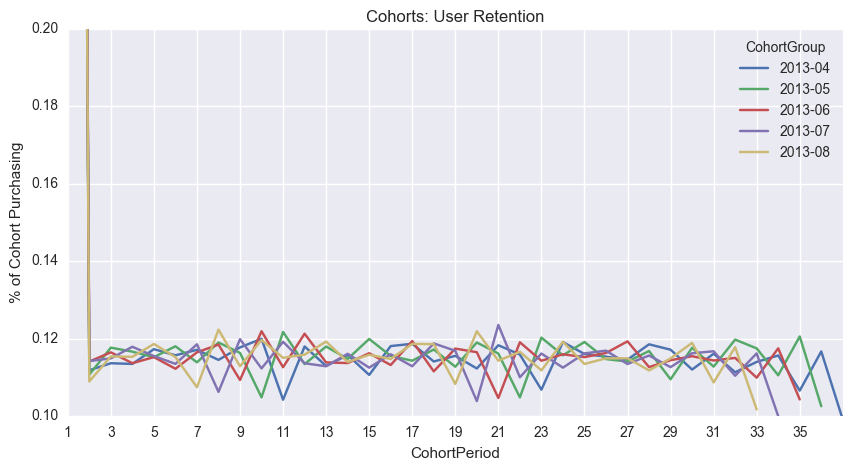

In [160]:
user_retention[user_retention.columns[:5]].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 37, 2))
plt.xlim(1, 37)
plt.ylim(0.1,0.2)
plt.ylabel('% of Cohort Purchasing');

#### Renaming the index

In [180]:
names = list(user_retention.columns)

In [192]:
new_index = {}
for x,i in enumerate(names,1):
    new_index[x]=i
    

In [197]:
user_retention1 = user_retention1.rename(index = new_index)

In [198]:
user_retention1

CohortGroup,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
2013-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2013-05,0.111900,0.110758,0.114145,0.114275,0.109008,0.111914,0.108191,0.111686,0.112653,0.102063,...,0.117609,0.107643,0.114248,0.107067,0.113662,0.116030,0.104872,0.115006,0.096181,NaN
2013-06,0.113701,0.117727,0.116516,0.114952,0.115458,0.112550,0.115124,0.118960,0.103509,0.118977,...,0.112448,0.117531,0.114614,0.117177,0.116399,0.110637,0.114526,0.103783,NaN,NaN
2013-07,0.113528,0.116690,0.113711,0.117951,0.115361,0.115962,0.117962,0.108215,0.121732,0.113403,...,0.119512,0.116597,0.114581,0.114674,0.112094,0.117968,0.105098,NaN,NaN,NaN
2013-08,0.117337,0.115264,0.115281,0.115564,0.118667,0.114724,0.104998,0.120862,0.115261,0.114941,...,0.113061,0.117725,0.116478,0.109057,0.115531,0.104243,NaN,NaN,NaN,NaN
2013-09,0.115744,0.118084,0.112276,0.113533,0.115296,0.105624,0.118542,0.110585,0.114392,0.113051,...,0.116641,0.119400,0.111285,0.116567,0.103985,NaN,NaN,NaN,NaN,NaN
2013-10,0.117164,0.113935,0.116516,0.118595,0.107517,0.118104,0.112448,0.118994,0.113232,0.119106,...,0.119061,0.111669,0.119141,0.102574,NaN,NaN,NaN,NaN,NaN,NaN
2013-11,0.114567,0.119056,0.118519,0.106310,0.122362,0.109371,0.114544,0.112220,0.117257,0.115069,...,0.109126,0.117048,0.102264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12,0.117788,0.116366,0.109371,0.119917,0.112930,0.115561,0.115285,0.116291,0.113426,0.114076,...,0.114996,0.104455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
user_retention1.to_csv('Cohort_matrix.csv',index = True)

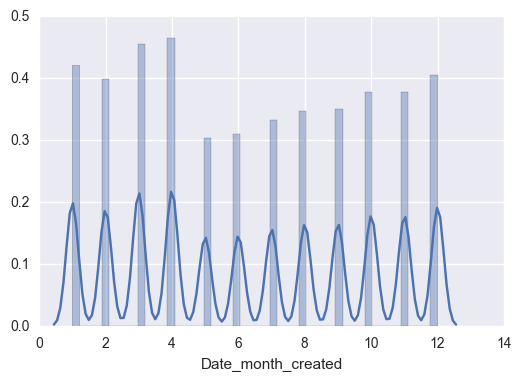

In [57]:
sns.distplot(orders['Date_month_created'])